In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import metrics
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv')

In [23]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [24]:
df.shape

(500, 9)

In [25]:
df.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [26]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [27]:
df.columns = [features.strip() for features in df.columns]

In [28]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [29]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [32]:
for i in df.columns:
    print("*************")
    print(i)
    print("*************")
    print(df[i].value_counts())

*************
Serial No.
*************
1      1
330    1
343    1
342    1
341    1
      ..
162    1
161    1
160    1
159    1
500    1
Name: Serial No., Length: 500, dtype: int64
*************
GRE Score
*************
312    24
324    23
316    18
321    17
327    17
322    17
320    16
314    16
311    16
317    15
325    15
315    13
323    13
308    13
304    12
326    12
313    12
300    12
318    12
319    12
305    11
310    11
301    11
307    10
299    10
298    10
329    10
328     9
331     9
340     9
309     9
330     8
332     8
334     8
306     7
302     7
297     6
303     5
296     5
295     5
336     5
338     4
333     4
335     4
339     3
294     2
290     2
337     2
293     1
Name: GRE Score, dtype: int64
*************
TOEFL Score
*************
110    44
105    37
104    29
106    28
107    28
112    28
103    25
100    24
102    24
99     23
101    20
111    20
113    19
108    19
109    19
114    18
116    16
115    11
98     10
118    10
119    10
120     9


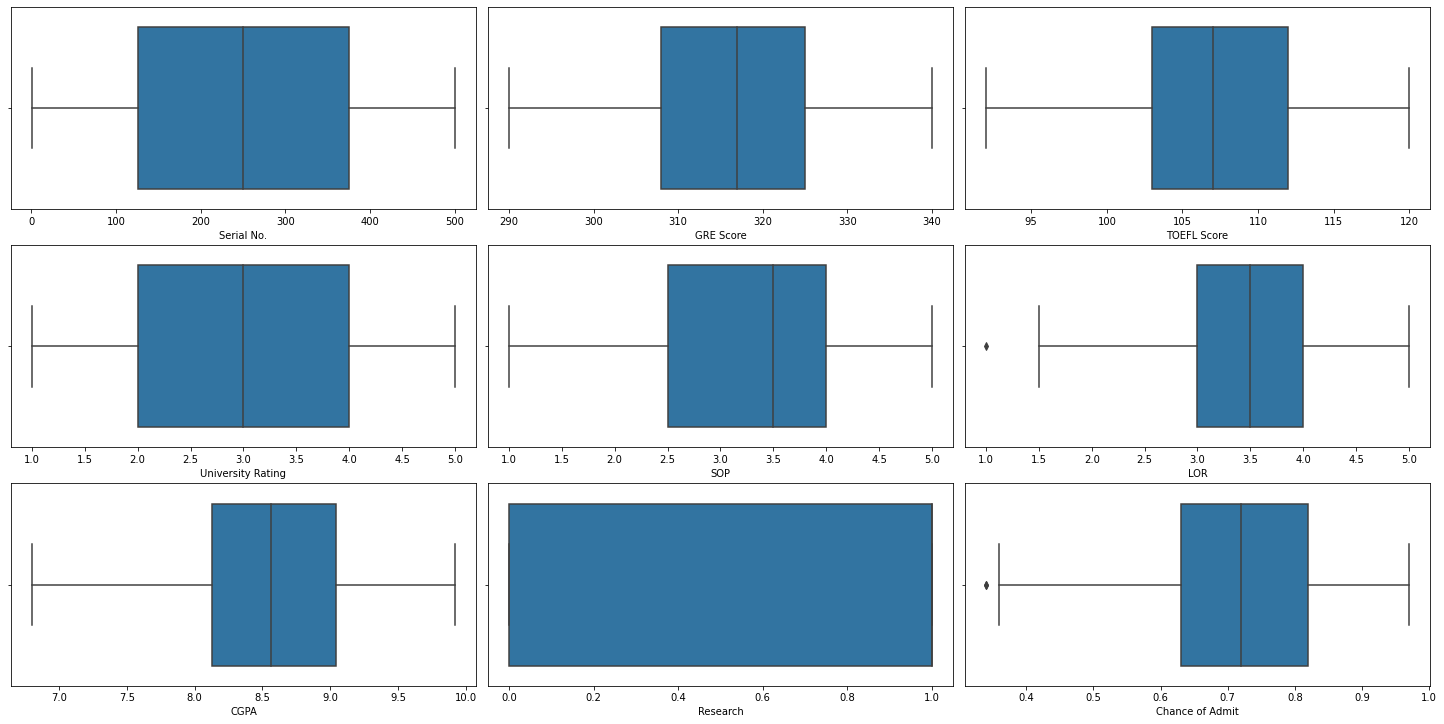

In [33]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(x = col, data = df, ax = ax[index])
    index += 1
    plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=0.5)

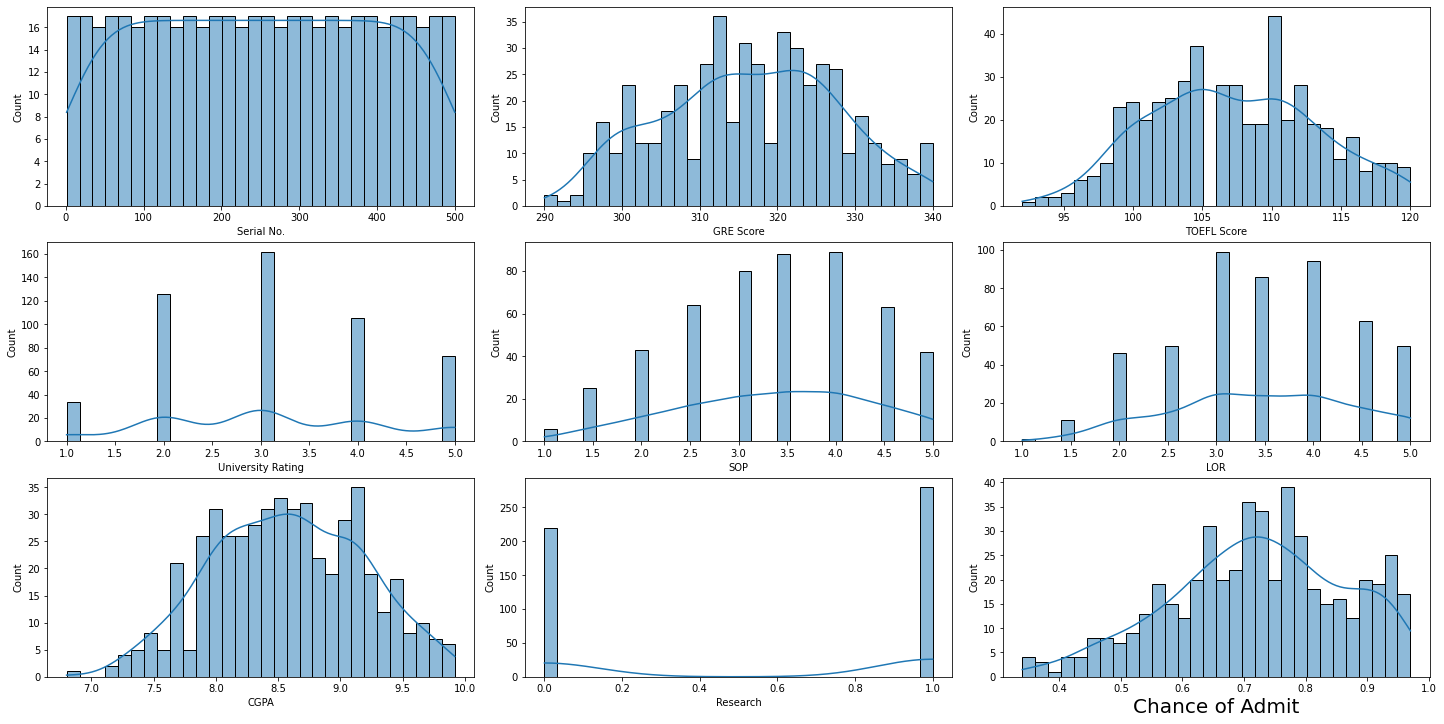

In [36]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize = (20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.histplot(value, ax = ax[index], kde=True, bins=30)
    plt.xlabel(col, fontsize=20)
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=0.5)

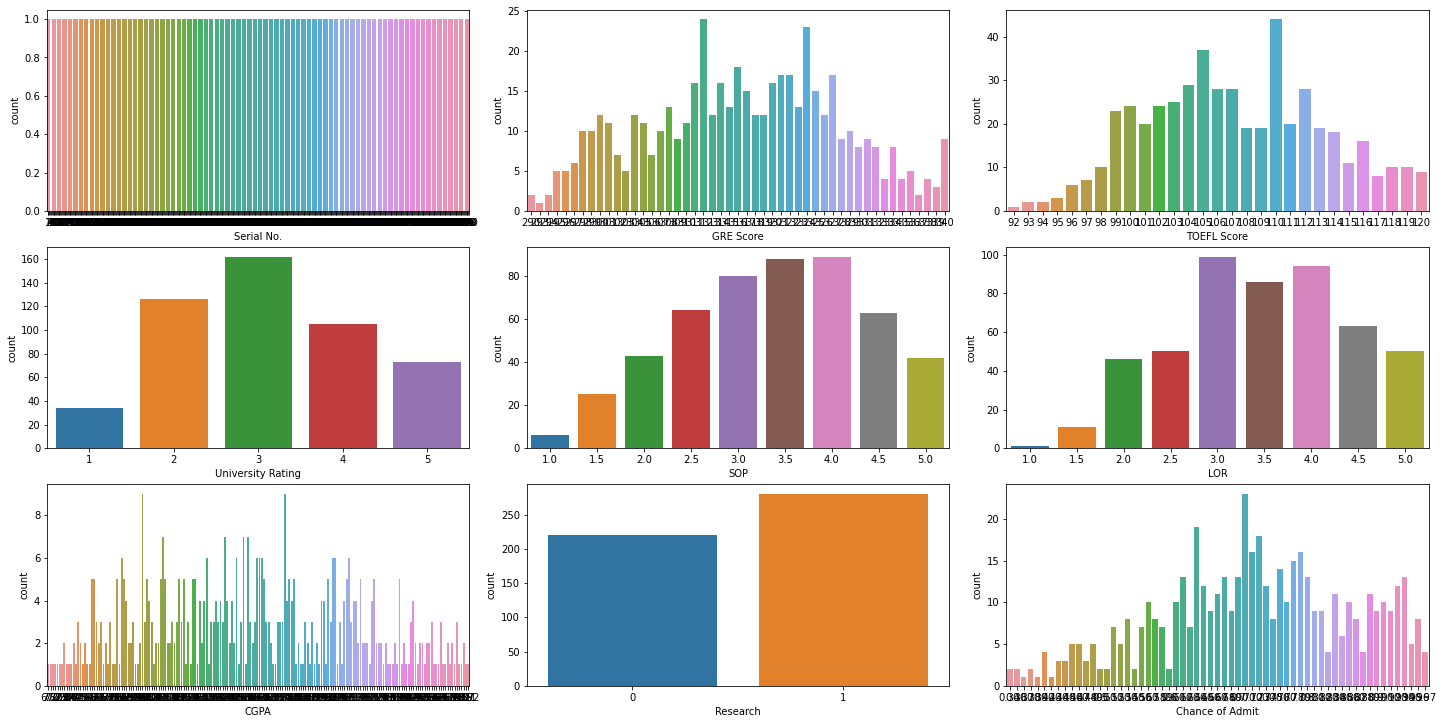

In [38]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize = (20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.countplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=0.5)

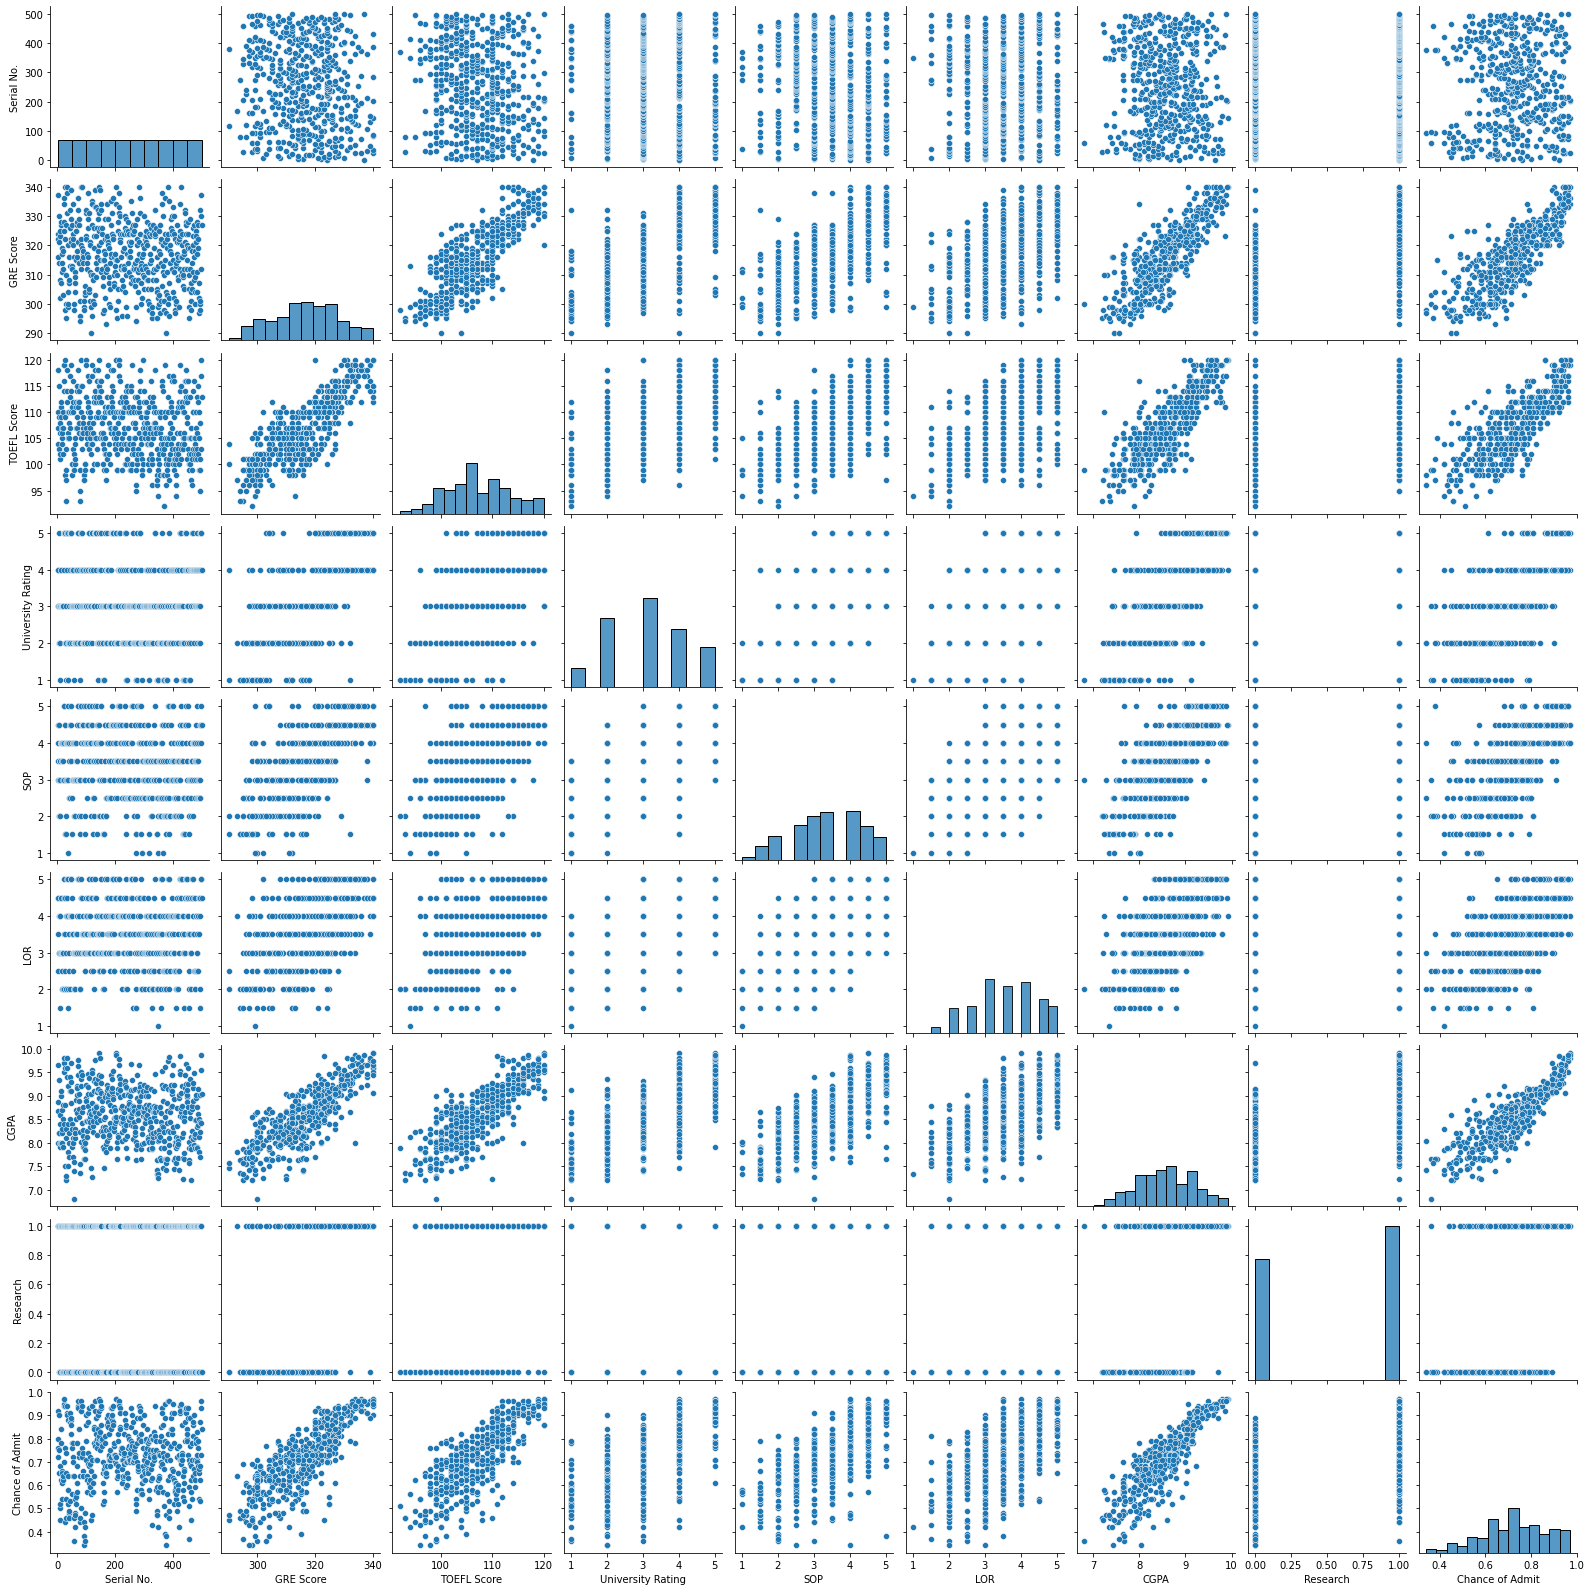

In [39]:
sns.pairplot(df)

<Axes: >

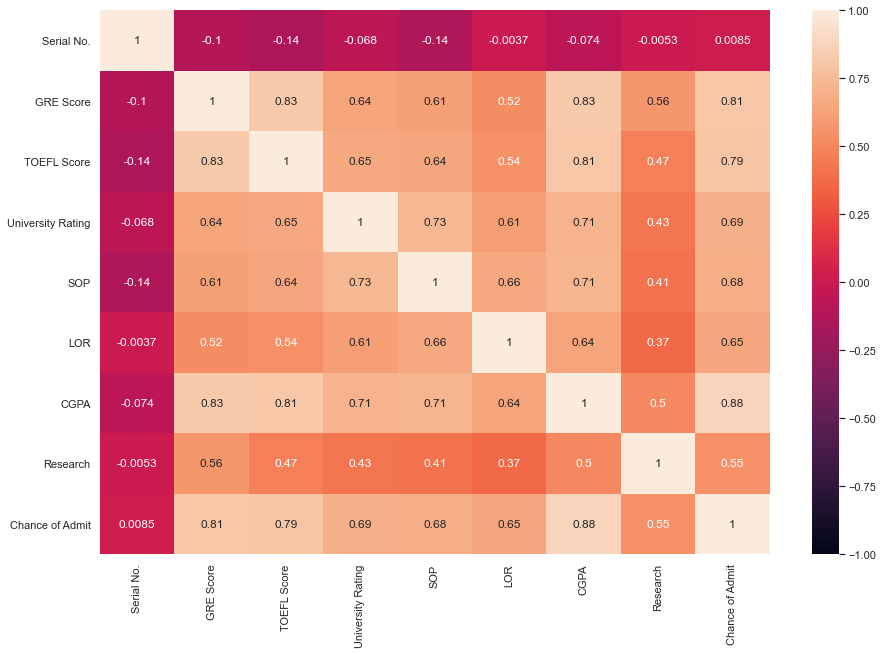

In [40]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data = df.corr(), annot = True, vmin=-1, vmax = 1)

In [41]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [42]:
df.drop(['Serial No.', 'GRE Score', 'TOEFL Score'], axis = 1, inplace = True)

In [59]:
X = df.iloc[ : , :-1]
y = df.iloc[ : , -1]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=34)

In [61]:
X_train.head()

,University Rating,SOP,LOR,CGPA,Research
162,3,3.0,3.0,8.50,0
266,2,2.0,2.5,8.45,0
237,5,4.5,5.0,9.19,1
170,2,2.5,3.5,8.04,1
441,1,1.5,3.0,8.66,1


In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(X_train.columns)
print(vif)

Index(['University Rating', 'SOP', 'LOR', 'CGPA', 'Research'], dtype='object')
[21.173706817246895, 37.77822555658735, 29.967354600051138, 26.23874669668462, 3.0153271953405385]


In [63]:
scaler = StandardScaler()

In [64]:
X_train_tf = scaler.fit_transform(X_train)
X_test_tf = scaler.transform(X_test)

In [65]:
model_SVR = SVR()
model_SVR.fit(X_train_tf, y_train)

SVR()

In [56]:
X_test_tf.shape

(165, 5)

In [57]:
y_train.shape

(335,)

In [66]:
train_score = model_SVR.score(X_train_tf, y_train)
train_score

0.7709840134242645

In [67]:
import pickle

with open('Admission.pkl', 'wb') as f:
    pickle.dump(model_SVR, f)

In [68]:
model_SVR_load = pickle.load(open('Admission.pkl', 'rb'))

In [69]:
test1 = scaler.transform([[5,4.5,4.5,9.6,1]])
test2 = scaler.transform([[5,4.5,3.5,8.8,0]])

In [70]:
#With Pickle
print(model_SVR_load.predict(test1))
print(model_SVR_load.predict(test2))

[0.89218621]
[0.74716424]


In [71]:
#without pickle
print(model_SVR.predict(test1))
print(model_SVR.predict(test2))

[0.89218621]
[0.74716424]


In [72]:
y_predict_SVR = model_SVR_load.predict(X_test_tf)

In [73]:
#GridSearch
from sklearn.model_selection import GridSearchCV

In [74]:
param_grid = {'C': [0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001], 'kernel':['linear', 'rbf']}

In [76]:
model_GRID_SVR = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)
model_GRID_SVR.fit(X_train_tf, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.747 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.735 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.692 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.791 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.870 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.602 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.587 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.601 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.645 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.747 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

[CV 5/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.873 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.743 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.727 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.652 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.794 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.819 total time=   0.0s
[CV 1/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.746 total time=   0.0s
[CV 2/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.737 total time=   0.0s
[CV 3/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.703 total time=   0.0s
[CV 4/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.807 total time=   0.0s
[CV 5/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.873 total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.735 total time=   0.0s
[CV 2/5] END .....C=10, gamm

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [77]:
print(model_GRID_SVR.best_estimator_)

SVR(C=10, gamma=1, kernel='linear')


In [78]:
model_GRID_SVR.score(X_train_tf, y_train)

0.7925913121880633

In [80]:
y_predict_grid = model_GRID_SVR.predict(X_test_tf)

In [82]:
print(f"MSE:{round(mean_squared_error(y_test,y_predict_grid),2)}\nMAE: {round(mean_absolute_error(y_test,y_predict_grid),2)}\nRMSE:{round(np.sqrt(mean_squared_error(y_test,y_predict_grid)),2)}")

MSE:0.0
MAE: 0.05
RMSE:0.07


In [83]:
GRID_r2_score = r2_score(y_test, y_predict_grid)
GRID_adj_r2_score = 1-((1-GRID_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"R-SquaredAccuracy:{round(GRID_r2_score*100,3)}%\nAdjustedR-SquaredAccuracy:{round(GRID_adj_r2_score*100,2)}%")

R-SquaredAccuracy:76.156%
AdjustedR-SquaredAccuracy:75.41%
